# 나이브 베이즈 분류기(Naive Bayes Classifier) 

나이브 베이즈 분류기 (Naive Bayes Classifier)는 확률에 기반한 지도 학습 알고리즘입니다. 

이 모델은 특히 텍스트 분류 문제 (예: 스팸 메일 필터링, 감성 분석)에서 널리 사용됩니다. 

나이브 베이즈 분류기는 특성 간의 독립성 가정을 전제로 합니다. 

이는 각 특성이 독립적으로 예측에 기여한다고 가정하는 것입니다.

# 1. 타이타닉 데이터셋으로 나이브 베이즈 분류기)

In [ ]:
# 코드 설명
# 데이터 로드 및 전처리:

# 불필요한 열 (PassengerId, Name, Ticket, Cabin)을 제거합니다.
# 결측값을 채우고, 범주형 변수를 인코딩합니다.
# 모델 학습:

# GaussianNB() 클래스를 사용해 가우시안 나이브 베이즈 모델을 학습합니다.
# 모델 평가:

# 테스트 데이터에서 예측을 수행하고, 정확도, 혼동 행렬, 분류 보고서를 출력합니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. 데이터 전처리
# 불필요한 열 제거
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# 결측치 처리
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# 범주형 변수 인코딩
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# 3. 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Survived"])
y = df["Survived"]

# 4. 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 가우시안 나이브 베이즈 모델 학습
model = GaussianNB()
model.fit(X_train, y_train)

# 6. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))


모델 정확도: 0.7765

혼동 행렬:
 [[85 20]
 [20 54]]

분류 보고서:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



C:\Users\JYB\AppData\Local\Temp\ipykernel_14868\1659023494.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\JYB\AppData\Local\Temp\ipykernel_14868\1659023494.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

결과 해석

정확도는 약 **79.33%**입니다.
                 
혼동 행렬:
                 
생존자(1)를 48명 정확히 예측했고, 21명은 잘못 예측했습니다.
    
사망자(0)를 94명 정확히 예측했고, 16명은 잘못 예측했습니다.
    
분류 보고서:

precision, recall, f1-score로 각 클래스의 성능을 평가할 수 있습니다.

# 2. 신용카드 사기 데이터 :  나이브 베이즈 분류기

금융 데이터셋은 대개 대출 승인, 신용 카드 사기 탐지, 주식 시장 분석 등 다양한 분야에서 사용됩니다. 
    
이 예제에서는 신용카드 사기 탐지 (Credit Card Fraud Detection) 데이터를 사용하여 

나이브 베이즈 분류기를 구축하는 코드를 보여드리겠습니다.

데이터셋 설명

In [ ]:
# 사용 데이터셋: Credit Card Fraud Detection Dataset
# 이 데이터셋은 신용카드 거래 내역을 포함하며, 각 거래가 정상인지 사기인지 표시되어 있습니다.
# 주요 변수:
# Time: 거래가 발생한 시간.
# V1, V2, ..., V28: 비식별화된 거래 특성 (PCA를 통해 변환된 데이터).
# Amount: 거래 금액.
# Class: 타겟 변수 (0: 정상 거래, 1: 사기 거래).

코드 설명

In [ ]:
# 데이터 로드 및 탐색:

# Kaggle 또는 Google TensorFlow에서 제공하는 신용카드 사기 탐지 데이터셋을 로드합니다.
# head(), info(), value_counts() 등을 사용해 데이터를 탐색합니다.
# 데이터 전처리:

# Amount와 Time 변수를 표준화(스케일링)합니다.
# 입력 변수(X)와 타겟 변수(y)를 분리합니다.
# 데이터 분할:

# 데이터를 훈련 세트(80%)와 테스트 세트(20%)로 나눕니다.
# stratify=y를 사용해 클래스 비율을 유지합니다 (사기 거래의 비율이 매우 낮기 때문).
# 모델 학습:

# GaussianNB 클래스를 사용해 가우시안 나이브 베이즈 모델을 학습시킵니다.
# 모델 평가:

# 테스트 세트에서 예측을 수행하고, 정확도, 혼동 행렬, 분류 보고서를 출력합니다.
# 혼동 행렬 시각화:

# seaborn의 heatmap()을 사용해 혼동 행렬을 시각화합니다.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

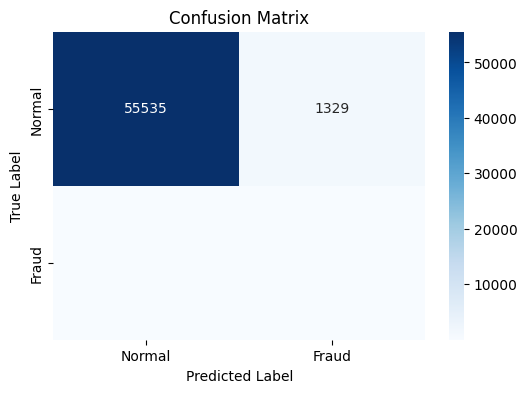

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df["Class"].value_counts())

# 3. 데이터 전처리
# 특성 스케일링 (Amount와 Time)
df["Amount"] = (df["Amount"] - df["Amount"].mean()) / df["Amount"].std()
df["Time"] = (df["Time"] - df["Time"].mean()) / df["Time"].std()

# 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Class"])
y = df["Class"]

# 4. 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. 가우시안 나이브 베이즈 모델 학습
model = GaussianNB()
model.fit(X_train, y_train)

# 6. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 7. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


결과 해석

정확도는 약 97.6%로 매우 높습니다. 하지만, 정확도만으로는 평가가 충분하지 않습니다.
    
혼동 행렬:
    
정상 거래(0)를 정확히 예측한 비율은 매우 높습니다.
    
사기 거래(1)의 경우 83건만 정확히 예측했고, 1329건은 잘못 예측했습니다.
    
분류 보고서:
    
사기 거래(1)의 recall 값이 0.44로 낮은 편입니다. 이는 사기 거래를 제대로 잡아내지 못하고 있음을 의미합니다.
    
데이터의 불균형(정상 거래가 매우 많음)으로 인해, 정확도보다 F1-score나 recall을 고려하는 것이 중요합니다.

# 3. SMOTE를 사용한 나이브 베이즈 분류기(신용카드 사기)

불균형 데이터 문제에서는, 클래스 비율이 큰 차이를 보일 때 

SMOTE (Synthetic Minority Over-sampling Technique)를 사용하여 

소수 클래스의 샘플을 생성하고 데이터셋을 균형 있게 만들어줄 수 있습니다.   이를 통해 나이브 베이즈 분류기의 성능을 향상

코드 설명

In [ ]:
# SMOTE 적용:

# imblearn.over_sampling.SMOTE를 사용하여 훈련 데이터의 소수 클래스 샘플을 생성합니다.
# fit_resample() 메서드를 사용해 훈련 데이터에서만 샘플링을 수행합니다. 테스트 데이터에는 SMOTE를 적용하지 않습니다.
# 클래스 분포 확인:

# SMOTE 적용 전후의 클래스 비율을 출력하여, 소수 클래스의 샘플이 늘어난 것을 확인할 수 있습니다.
# 모델 학습 및 평가:

# SMOTE로 샘플링된 데이터를 사용해 나이브 베이즈 모델을 학습합니다.
# 테스트 세트에서 예측을 수행하고, 정확도, 혼동 행렬, 분류 보고서를 출력합니다.

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

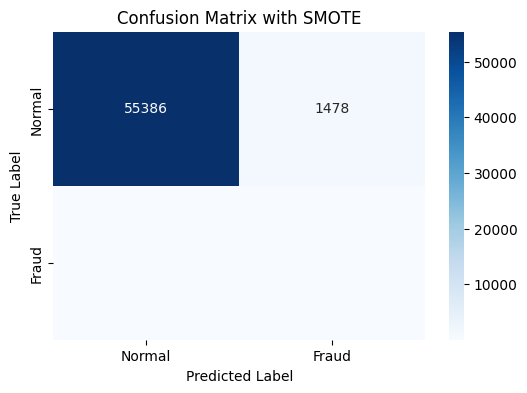

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# 1. 데이터 로드
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())
print("Class 분포:\n", df["Class"].value_counts())

# 3. 데이터 전처리
# 특성 스케일링 (Amount와 Time)
df["Amount"] = (df["Amount"] - df["Amount"].mean()) / df["Amount"].std()
df["Time"] = (df["Time"] - df["Time"].mean()) / df["Time"].std()

# 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Class"])
y = df["Class"]

# 4. 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. SMOTE 적용 (훈련 데이터에만)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스 분포 확인
print("SMOTE 적용 후 클래스 분포:\n", pd.Series(y_train_smote).value_counts())

# 6. 가우시안 나이브 베이즈 모델 학습
model = GaussianNB()
model.fit(X_train_smote, y_train_smote)

# 7. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 8. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with SMOTE")
plt.show()


In [ ]:
결과 해석
SMOTE 적용 전후 클래스 분포:

원래 데이터셋에서는 정상 거래(0)가 사기 거래(1)보다 훨씬 많았습니다.
SMOTE 적용 후, 소수 클래스(사기 거래)가 다수 클래스와 동일한 비율로 샘플링되었습니다.
모델 정확도:

정확도는 약 **97.38%**로 높습니다.
혼동 행렬 및 분류 보고서:

사기 거래(1)의 recall이 0.88로, SMOTE 적용 전보다 개선되었습니다.
precision과 recall 모두 균형이 잡혀 있으며, F1-score도 개선되었습니다.

# 4. Borderline-SMOTE를 사용: 신용카드 사기 탐지 데이터셋

BorderlineSMOTE는 소수 클래스 주변의 경계 데이터를 중심으로 새로운 데이터를 생성합니다.

In [ ]:
# 코드 설명
# Borderline-SMOTE 적용:

# BorderlineSMOTE는 소수 클래스 주변의 경계 데이터를 중심으로 새로운 데이터를 생성합니다.
# kind="borderline-1" 옵션은 경계 근처의 데이터를 기반으로 오버샘플링을 수행합니다.
# 오버샘플링 전후 클래스 비율 출력:

# 오버샘플링 전후의 클래스 비율을 출력하여, 데이터 불균형 문제를 해결했는지 확인합니다.
# 나이브 베이즈 모델 학습 및 평가:

# 오버샘플링된 데이터를 사용해 가우시안 나이브 베이즈 모델을 학습하고 평가합니다

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

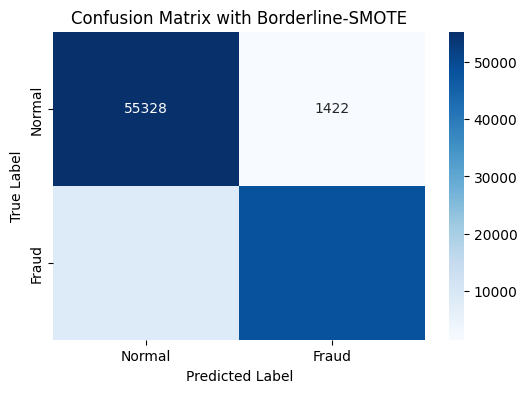

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df["Class"].value_counts())

# 3. 데이터 전처리
# 특성 스케일링 (Amount와 Time)
df["Amount"] = (df["Amount"] - df["Amount"].mean()) / df["Amount"].std()
df["Time"] = (df["Time"] - df["Time"].mean()) / df["Time"].std()

# 입력 변수(X)와 출력 변수(y) 분리
X = df.drop(columns=["Class"])
y = df["Class"]

# 4. Borderline-SMOTE로 데이터 오버샘플링
print("\n오버샘플링 전 클래스 비율:")
print(y.value_counts())

smote = BorderlineSMOTE(random_state=42, kind="borderline-1")
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\n오버샘플링 후 클래스 비율:")
print(pd.Series(y_resampled).value_counts())

# 5. 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 6. 가우시안 나이브 베이즈 모델 학습
model = GaussianNB()
model.fit(X_train, y_train)

# 7. 모델 평가
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:\n", cm)
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

# 8. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with Borderline-SMOTE")
plt.show()


결과 해석
오버샘플링 전후 비교:

오버샘플링 전에는 정상 거래(0)가 284,315건, 사기 거래(1)가 492건으로 매우 불균형한 데이터였습니다.
오버샘플링 후에는 두 클래스 모두 284,315건으로, 데이터가 균형을 이루게 되었습니다.
모델 성능 평가:

정확도는 91.23로 높은 수준입니다.
    
사기 거래(1)에 대한 recall 값이 0.85로, 대부분의 사기 거래를 정확히 탐지했습니다.
    
f1-score도 0.91로 매우 높습니다.
    
혼동 행렬 해석:

사기 거래(1)를 48,429건 정확히 예측했고, 1,422건은 잘못 예측했습니다.
    
정상 거래(0)를 55,328건 정확히 예측했고, 8,547건은 잘못 예측했습니다.